In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

C:\Users\AHMED_ALFAIQ\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\AHMED_ALFAIQ\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\AHMED_ALFAIQ\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
dataset=pd.read_csv('dataset_q2_q4.csv')

In [3]:
Y=dataset['y_label']
X=dataset.drop('y_label', axis=1)

In [4]:
X=np.array(X)
Y=np.array(Y)

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = .4, random_state = 10)

In [6]:
def predict(x,theta1,theta2,theta3,theta0):
    return 3*theta1 * x[:,0]**2 + theta2 * x[:,2]**3 - theta3 * x[:,1]**3 + theta2*theta3 * x[:,2]**3 +theta0

In [7]:
def CostFunction(y, y_hat):
    return np.sum((y_hat - y) ** 2) / (2*len(y))
    

0.029999948042242545 0.20326345186235417 -0.5442120652146653 -2.600405398251075


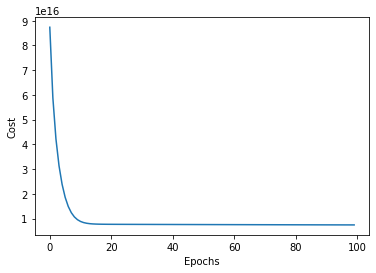

In [8]:
theta1=0.2
theta2=0.1
theta3=0.03
theta0=0.03

lr=0.00000000000000001
epochs=100
cost=[]
n=X_train.shape[0]
for i in range(epochs):       
    y_hat=predict(X_train,theta1,theta2,theta3,theta0)
    loss = y_hat-y_train
    # print(loss)
    # y=3*theta1 * x1**2+ theta2*x3**3- theta3*x2**3+theta2*theta3*x3**3+theta0
    d_theta0=(np.sum(loss)/n)
    d_theta1=np.sum(((3*X_train[:,0]**2))*(loss))/n
    d_theta2=np.sum(((1+theta3)*X_train[:,2]**3)*(loss))/n    
    d_theta3=np.sum((theta2*X_train[:,2]**3-X_train[:,1]**3)*(loss))/n
    
    # print(d_theta1,', ',d_theta2,', ',d_theta3,', ',d_theta0)
    theta0 = theta0 - lr*d_theta0
    theta1=theta1 - lr*d_theta1
    theta2=theta2 - lr*d_theta2
    theta3=theta3 - lr*d_theta3
            
    cost.append(CostFunction(y_train,y_hat))
    
plt.plot(list(range(epochs)),cost)
plt.xlabel("Epochs")
plt.ylabel("Cost")

print(theta0,theta1,theta2,theta3)

# Q3 

In [76]:
x,y=make_regression(n_samples=500,n_features=15)

In [77]:
x_tr,x_te,y_tr,y_te = train_test_split(x,y, test_size = .3, random_state = 0)

# 1 Linear 

In [78]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
lr = LinearRegression()

lr.fit(x_tr,y_tr)
y_pred = lr.predict(x_te)
lmse=mean_squared_error(y_pred,y_te)
print(lmse)

1.0708869487293466e-25


# 2 Lasso

In [87]:
from sklearn.linear_model import Lasso
lasso = Lasso(random_state=10, alpha=.1) 
lasso.fit(x_tr,y_tr)
y_pred = lasso.predict(x_te)
lamse = (mean_squared_error(y_pred,y_te))
print(lamse)

0.14526498591274423


# 3 Ridge

In [88]:
from sklearn.linear_model import Ridge
rid = Ridge(alpha=1)
rid.fit(x_tr,y_tr)
y_pred = rid.predict(x_te)
ridmse = (mean_squared_error(y_pred,y_te))
print(ridmse)

0.3274485743785462


# 4 PolynomialFeatures

In [89]:
from sklearn.preprocessing import PolynomialFeatures 
poly= PolynomialFeatures()
x_new= poly.fit_transform(x_tr)
x_test= poly.fit_transform(x_te)
models = LinearRegression()
models.fit(x_new,y_tr)
y_new = models.predict(x_test)
ploymse = mean_squared_error(y_new,y_te)
print(ploymse)

2.194461102162136e-25


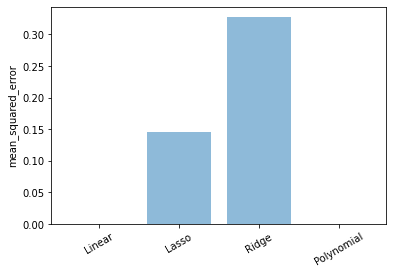

In [90]:
labels = ('Linear','Lasso','Ridge','Polynomial')
ob = [lmse,lamse,ridmse,ploymse]
xpos=np.arange(4)
plt.bar(xpos,ob,align='center',alpha=0.5)
plt.xticks(xpos,labels,rotation=30)
plt.ylabel('mean_squared_error')
plt.show()

# Q4

In [6]:
data=pd.read_csv('dataset_q2_q4.csv')

In [7]:
Y4=data['y_label']
X4=data.drop('y_label', axis=1)

In [ ]:
X_tr,X_te,Y_tr,Y_te = train_test_split(X4,Y4, test_size = .3, random_state = 0)

In [ ]:
# adding a column  of "ones"
Xx = np.hstack((np.ones((X_tr.shape[0], 1)), X_tr))
w = np.linalg.inv(Xx.T.dot(Xx)).dot(Xx.T).dot(Y_tr)
print( w[1],w[2],w[3])
print('Intercept: %.3f' % w[0])

In [8]:
# adding a column  of "ones"
Xx = np.hstack((np.ones((X4.shape[0], 1)), X4))
w = np.zeros(Xx.shape[1])
w = np.linalg.inv(Xx.T.dot(Xx)).dot(Xx.T).dot(Y4)
print( w[1],w[2],w[3])
print('Intercept: %.3f' % w[0])

-12771919.655649833 3074214.09902675 9808692.976213627
Intercept: -1936877362.751
